<a href="https://colab.research.google.com/github/whyrzky/Python-Fundamental/blob/main/Python%20Fundamental%20%232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/da4_student_scores_descriptive - student_scores_assignment.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_id     49 non-null     int64  
 1   Hours          46 non-null     float64
 2   Math_Scores    45 non-null     float64
 3   Bahasa_Scores  49 non-null     int64  
 4   Social_Scores  49 non-null     int64  
 5   Gender         49 non-null     object 
 6   Class          49 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 2.8+ KB


#Question
1. Find missing value on column and replace it with mean value !
3. Please Describe your new data!
2. Please detect outlier with visualization : scatter plot, box plot!
3. In there outlier in Hours Math_Scores Bahasa_Scores Social_Scores ? if yes, please find the outlier limit
4. Remove outlier !
5. Describe your new data and visualize with scatter plot and box plot!

##Answer 1

In [ ]:
df.isna().sum()

Student_id       0
Hours            3
Math_Scores      4
Bahasa_Scores    0
Social_Scores    0
Gender           0
Class            0
dtype: int64

In [ ]:
rataan_hours = df['Hours'].mean()
rataan_math_scores = df['Math_Scores'].mean()
df['Hours'] = df['Hours'].fillna(rataan_hours)
df['Math_Scores'] = df['Math_Scores'].fillna(rataan_math_scores)
df.isna().sum()

Student_id       0
Hours            0
Math_Scores      0
Bahasa_Scores    0
Social_Scores    0
Gender           0
Class            0
dtype: int64

##Answer 2

In [ ]:
df.describe()

,Student_id,Hours,Math_Scores,Bahasa_Scores,Social_Scores
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,5422.040816,4.795652,49.377778,62.183673,43.571429
std,3109.932857,2.405112,23.546310,68.478912,24.150569
min,555.000000,1.100000,17.000000,5.000000,2.000000
25%,2107.000000,2.500000,27.000000,31.000000,15.000000
50%,6296.000000,4.795652,49.377778,63.000000,50.000000
75%,8222.000000,6.900000,69.000000,70.000000,61.000000
max,9889.000000,9.200000,88.000000,500.000000,80.000000


As we can see in the results, there seems to be an outlier in the language score column. We see that the maximum value is 500, but there are so many values ​​under 100 in that column. So, we gonna check the outlier using some tools in answer 3

## Answer 3

In [ ]:
# Importing
import sklearn
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_id     49 non-null     int64  
 1   Hours          49 non-null     float64
 2   Math_Scores    49 non-null     float64
 3   Bahasa_Scores  49 non-null     int64  
 4   Social_Scores  49 non-null     int64  
 5   Gender         49 non-null     object 
 6   Class          49 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 2.8+ KB


####Check outlier using Box Plot

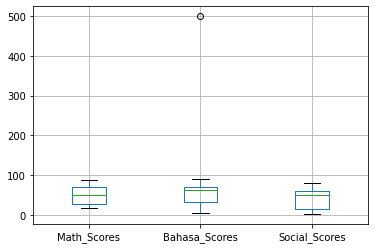

In [ ]:
df.boxplot(column=['Math_Scores','Bahasa_Scores','Social_Scores'])

In [ ]:
print(np.where(df['Bahasa_Scores']>100))

(array([2]),)


####Check outlier using Scatter Plot

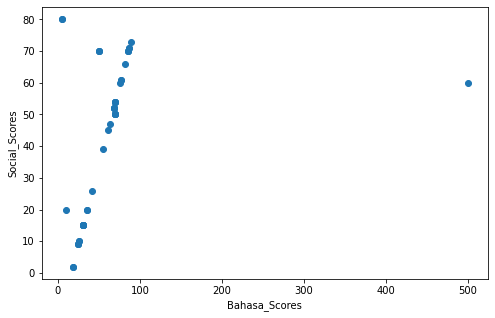

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(df['Bahasa_Scores'],df["Social_Scores"])
# x-axis label
ax.set_xlabel('Bahasa_Scores')
 
# y-axis label
ax.set_ylabel('Social_Scores')
plt.show()

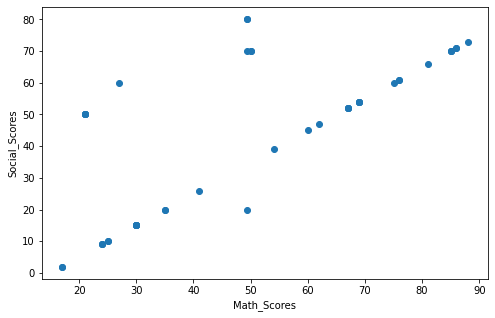

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(df['Math_Scores'],df["Social_Scores"])
# x-axis label
ax.set_xlabel('Math_Scores')
 
# y-axis label
ax.set_ylabel('Social_Scores')
plt.show()

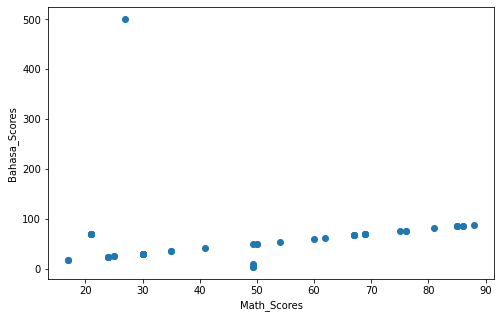

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(df['Math_Scores'],df["Bahasa_Scores"])
# x-axis label
ax.set_xlabel('Math_Scores')
 
# y-axis label
ax.set_ylabel('Bahasa_Scores')
plt.show()

In [ ]:
print(np.where(df['Bahasa_Scores']>100))

(array([2]),)


##Answer 4
In the boxplot, we can see that there is only 1 outlier, which in Bahasa_Scores column with value of 500 in index 2. It might be caused by human error. But, lets we check with the quantile methods

In [ ]:
df

,Student_id,Hours,Math_Scores,Bahasa_Scores,Social_Scores,Gender,Class
0,5388,2.500000,21.000000,70,50,F,A
1,3107,5.100000,49.377778,50,70,M,B
2,740,3.200000,27.000000,500,60,A,C
3,6609,8.500000,75.000000,76,60,M,C
4,9889,3.500000,30.000000,31,15,M,A
5,1286,1.500000,49.377778,10,20,M,A
6,8222,9.200000,88.000000,89,73,F,A
7,9571,5.500000,60.000000,61,45,M,B
8,1675,8.300000,81.000000,82,66,F,B
9,8982,2.700000,25.000000,26,10,F,A


In [ ]:
#Outlier Limit Hours
Q1 = np.percentile(df['Hours'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Hours'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper_limit= Q3+1.5*IQR
lower_limit= Q1-1.5*IQR

print("upper_limit is",upper_limit)
print("lower_limit is",round(lower_limit,2))
print("=====================================")

# Upper bound
upper = np.where(df['Hours'] >= upper_limit)
# Lower bound
lower = np.where(df['Hours'] <= lower_limit)

print(upper)
print(lower)

upper_limit is 13.5
lower_limit is -4.1
(array([], dtype=int64),)
(array([], dtype=int64),)


In [ ]:
#Outlier Limit Math_Scores
Q1 = np.percentile(df['Math_Scores'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Math_Scores'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper_limit= Q3+1.5*IQR
lower_limit= Q1-1.5*IQR

print("upper_limit is",upper_limit)
print("lower_limit is",round(lower_limit,2))
print("=====================================")

# Upper bound
upper = np.where(df['Math_Scores'] >= upper_limit)
# Lower bound
lower = np.where(df['Math_Scores'] <= lower_limit)

print(upper)
print(lower)

upper_limit is 132.0
lower_limit is -36.0
(array([], dtype=int64),)
(array([], dtype=int64),)


In [ ]:
#Outlier Limit Bahasa_Scores
Q1 = np.percentile(df['Bahasa_Scores'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Bahasa_Scores'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper_limit= Q3+1.5*IQR
lower_limit= Q1-1.5*IQR

print("upper_limit is",upper_limit)
print("lower_limit is",round(lower_limit,2))
print("=====================================")

# Upper bound
upper = np.where(df['Bahasa_Scores'] >= upper_limit)
# Lower bound
lower = np.where(df['Bahasa_Scores'] <= lower_limit)

print(upper)
print(lower)

upper_limit is 128.5
lower_limit is -27.5
(array([2]),)
(array([], dtype=int64),)


In [ ]:
#Outlier Limit Social_Scores
Q1 = np.percentile(df['Social_Scores'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Social_Scores'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper_limit= Q3+1.5*IQR
lower_limit= Q1-1.5*IQR

print("upper_limit is",upper_limit)
print("lower_limit is",round(lower_limit,2))
print("=====================================")

# Upper bound
upper = np.where(df['Social_Scores'] >= upper_limit)
# Lower bound
lower = np.where(df['Social_Scores'] <= lower_limit)

print(upper)
print(lower)

upper_limit is 130.0
lower_limit is -54.0
(array([], dtype=int64),)
(array([], dtype=int64),)


Valid, the outlier is only in Bahasa_scores column with value of 500 in index 2

##Answer 5
So we gonna remove the outlier based on answer 4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


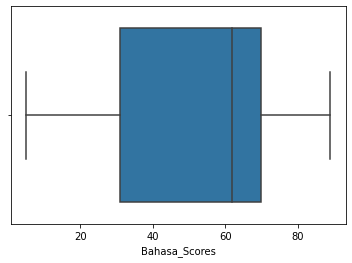

In [ ]:
#Remove Outlier
outlier = np.where(df['Bahasa_Scores']>100)
df.drop(outlier[0], inplace = True)
sns.boxplot(df['Bahasa_Scores'])

##Answer 6

In [ ]:
#Describe data
df.describe()

,Student_id,Hours,Math_Scores,Bahasa_Scores,Social_Scores
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,5519.583333,4.828895,49.843981,53.062500,43.229167
std,3066.158972,2.419161,23.565834,25.016085,24.285745
min,555.000000,1.100000,17.000000,5.000000,2.000000
25%,2561.500000,2.500000,28.750000,31.000000,15.000000
50%,6296.000000,4.795652,49.377778,62.000000,50.000000
75%,8267.250000,7.025000,69.000000,70.000000,62.250000
max,9889.000000,9.200000,88.000000,89.000000,80.000000


After we remove the outlier, there is outlier data in the dataframe. As we can see, the maximum value of Bahasa_Scores now is 89, instead of 500.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


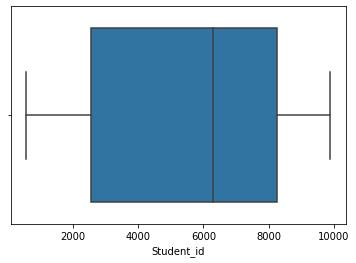

In [ ]:
sns.boxplot(df['Student_id'])

There is no outlier here

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


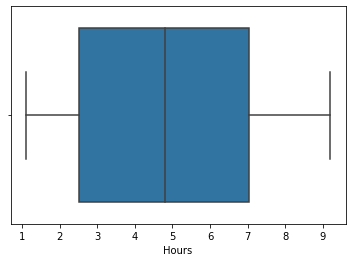

In [ ]:
sns.boxplot(df['Hours'])

There is no outlier here

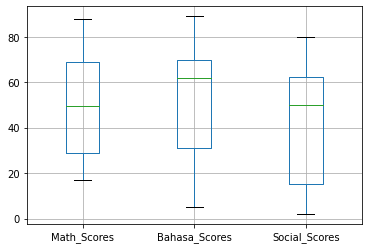

In [ ]:
df.boxplot(column=['Math_Scores','Bahasa_Scores','Social_Scores'])

There is no outlier here

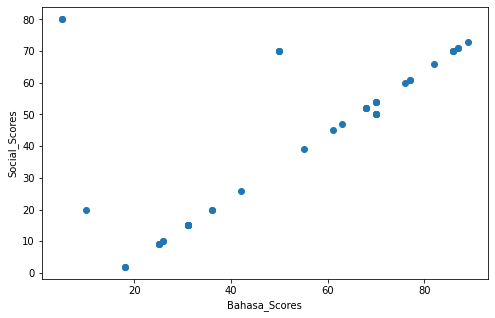

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(df['Bahasa_Scores'],df["Social_Scores"])
# x-axis label
ax.set_xlabel('Bahasa_Scores')
 
# y-axis label
ax.set_ylabel('Social_Scores')
plt.show()

Its looks like that the higher bahasa score, higher social scores

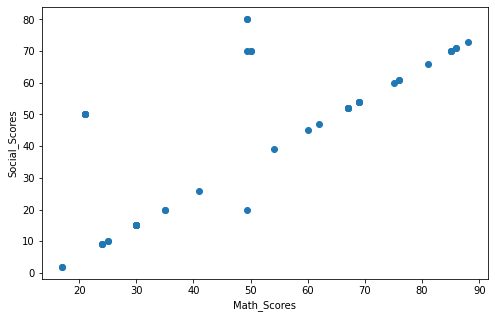

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(df['Math_Scores'],df["Social_Scores"])
# x-axis label
ax.set_xlabel('Math_Scores')
 
# y-axis label
ax.set_ylabel('Social_Scores')
plt.show()

Its looks like that the higher math_score, higher social scores

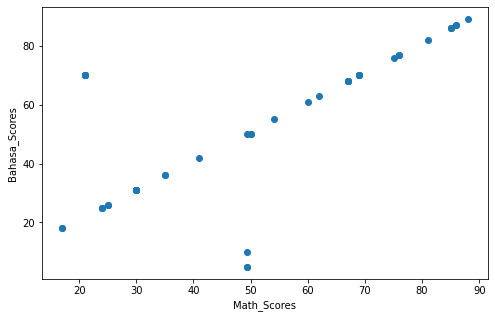

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(df['Math_Scores'],df["Bahasa_Scores"])
# x-axis label
ax.set_xlabel('Math_Scores')
 
# y-axis label
ax.set_ylabel('Bahasa_Scores')
plt.show()

Its looks like that the higher math scores, higher bahasa scores